In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

from api_keys import g_key
%matplotlib inline
!jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [2]:
csv_path = 'Final_Yelp_Data.csv'
yelp_df = pd.read_csv(csv_path)
yelp_df.sort_values("price")


,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,Unnamed: 0.1
590,936,BhZTAO6UedfIP5aRbbNWVw,k-and-k-soul-food-atlanta,K & K Soul Food,https://s3-media2.fl.yelpcdn.com/bphoto/pPjGHL...,False,https://www.yelp.com/biz/k-and-k-soul-food-atl...,91,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.0,"{'latitude': 33.7734107971191, 'longitude': -8...","['delivery', 'pickup']",{'address1': '881 Donald Lee Hollowell Pkwy NW...,1.404685e+10,(404) 685-1073,3703.939909,$,336.0
315,628,nyhDbHQzN9BtAm0Yl-070A,taco-bell-sacramento-26,Taco Bell,https://s3-media3.fl.yelpcdn.com/bphoto/lokm4d...,False,https://www.yelp.com/biz/taco-bell-sacramento-...,52,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",2.5,"{'latitude': 38.638117, 'longitude': -121.477428}",['delivery'],"{'address1': '3820 Northgate Blvd', 'address2'...",1.916649e+10,(916) 649-1790,12605.418771,$,28.0
314,627,9AYA0zb9QYN9ftWulspOIA,taco-bell-north-highlands,Taco Bell,https://s3-media4.fl.yelpcdn.com/bphoto/_w8ENz...,False,https://www.yelp.com/biz/taco-bell-north-highl...,20,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",3.0,"{'latitude': 38.65437, 'longitude': -121.383445}",['delivery'],"{'address1': '4915 Watt Ave', 'address2': '', ...",1.916338e+10,(916) 338-1730,6754.754318,$,27.0
312,624,UCDW0VdlKzvQ24WU2eQqQw,togo-s-sandwiches-roseville-4,Togo’s Sandwiches,https://s3-media3.fl.yelpcdn.com/bphoto/iMpyia...,False,https://www.yelp.com/biz/togo-s-sandwiches-ros...,81,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",3.0,"{'latitude': 38.782757, 'longitude': -121.266261}","['pickup', 'delivery']","{'address1': '6706 Stanford Ranch Rd', 'addres...",1.916773e+10,(916) 772-8646,11778.048112,$,24.0
311,623,Wf0r2uDIjLt7PncsTHLQVg,chipotle-mexican-grill-sacramento-9,Chipotle Mexican Grill,https://s3-media2.fl.yelpcdn.com/bphoto/3a-RXz...,False,https://www.yelp.com/biz/chipotle-mexican-gril...,115,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",3.0,"{'latitude': 38.6100294, 'longitude': -121.385...",['delivery'],"{'address1': '3328 El Camino Ave', 'address2':...",1.916486e+10,(916) 485-6305,11663.401081,$,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1016,Onql8BafDrjHO35q1HkRZA,butterclaw-lobster-chicago,Butterclaw Lobster,https://s3-media2.fl.yelpcdn.com/bphoto/sD-pfA...,False,https://www.yelp.com/biz/butterclaw-lobster-ch...,2,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",2.5,"{'latitude': 41.92465, 'longitude': -87.73348}","['pickup', 'delivery']","{'address1': '4242 W Fullerton St', 'address2'...",1.773800e+10,(773) 799-8865,6480.624568,NaN,416.0
671,1017,zA_Er1ZRLc99fzRuA_-PkA,tacos-el-paraiso-chicago,Tacos El Paraiso,https://s3-media2.fl.yelpcdn.com/bphoto/6vmLu-...,False,https://www.yelp.com/biz/tacos-el-paraiso-chic...,9,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,"{'latitude': 41.93878, 'longitude': -87.8064}","['pickup', 'delivery']","{'address1': '3225 N Harlem Ave', 'address2': ...",1.773284e+10,(773) 283-8780,6133.589810,NaN,417.0
688,1036,t-LgC8KgOZO0KElAUcHCsw,melys-churros-sacramento,Mely's Churros,https://s3-media1.fl.yelpcdn.com/bphoto/QMl6l5...,False,https://www.yelp.com/biz/melys-churros-sacrame...,8,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",4.5,"{'latitude': 38.525223, 'longitude': -121.45486}",[],"{'address1': '4441 Fruitridge Rd', 'address2':...",1.916704e+10,(916) 704-1289,10748.023362,NaN,438.0
696,1047,RVYkgN638ZbJANFAN6Zgmg,tacos-brambila-sacramento-2,Tacos Brambila Catering,https://s3-media1.fl.yelpcdn.com/bphoto/iUhw42...,False,https://www.yelp.com/biz/tacos-brambila-sacram...,21,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",5.0,"{'latitude': 38.5243503261488, 'longitude': -1...",[],"{'address1': '5615 Franklin Blvd', 'address2':...",1.916418e+10,(916) 417-8459,11703.547937,NaN,451.0


In [3]:
del yelp_df['Unnamed: 0.1'],yelp_df['Unnamed: 0'],yelp_df['distance'],yelp_df['is_closed']
del yelp_df['image_url'],yelp_df['phone'],yelp_df['display_phone'],yelp_df['id'], yelp_df['alias'], yelp_df["url"]
yelp_df.head()

,name,review_count,categories,rating,coordinates,transactions,location,price
0,Junoon Flavors Of India,20,"[{'alias': 'indpak', 'title': 'Indian'}]",5.0,"{'latitude': 38.570471, 'longitude': -121.4571...",[],"{'address1': '3672 J St', 'address2': None, 'a...",NaN
1,Shake Shack,168,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.0,"{'latitude': 38.568686, 'longitude': -121.487243}",['delivery'],"{'address1': '1710 R St', 'address2': 'Ste 190...",NaN
2,South,1590,"[{'alias': 'southern', 'title': 'Southern'}]",4.0,"{'latitude': 38.5687015705627, 'longitude': -1...",['delivery'],"{'address1': '2005 11th St', 'address2': '', '...",$$
3,Fixins Soul Kitchen,946,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...",4.5,"{'latitude': 38.55147, 'longitude': -121.46924}",['delivery'],"{'address1': '3428 3rd Ave', 'address2': '', '...",$$
4,Chando’s Tacos,14,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,"{'latitude': 38.564075, 'longitude': -121.4340...",[],"{'address1': '5644 J St', 'address2': '', 'add...",NaN


In [4]:
yelp_df['transactions'].value_counts()

['delivery']                                        316
[]                                                  175
['pickup', 'delivery']                              120
['delivery', 'pickup']                               86
['pickup']                                            9
['restaurant_reservation', 'delivery']                3
['restaurant_reservation']                            2
['restaurant_reservation', 'pickup', 'delivery']      2
['restaurant_reservation', 'delivery', 'pickup']      1
Name: transactions, dtype: int64

In [5]:
yelp_df['transactions'] = yelp_df['transactions'].replace(
    {"['delivery']": "True", 
     "[]": "False",
     "['pickup', 'delivery']": "True", 
     "['delivery', 'pickup']": "True", 
     "['pickup']":  "False",
     "['restaurant_reservation', 'delivery']":"True", 
     "['restaurant_reservation', 'pickup', 'delivery']":"True",
     "['restaurant_reservation']":'Theft',
     "['restaurant_reservation', 'delivery', 'pickup']": "True",
    })

In [6]:
yelp_df.head()

,name,review_count,categories,rating,coordinates,transactions,location,price
0,Junoon Flavors Of India,20,"[{'alias': 'indpak', 'title': 'Indian'}]",5.0,"{'latitude': 38.570471, 'longitude': -121.4571...",False,"{'address1': '3672 J St', 'address2': None, 'a...",NaN
1,Shake Shack,168,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.0,"{'latitude': 38.568686, 'longitude': -121.487243}",True,"{'address1': '1710 R St', 'address2': 'Ste 190...",NaN
2,South,1590,"[{'alias': 'southern', 'title': 'Southern'}]",4.0,"{'latitude': 38.5687015705627, 'longitude': -1...",True,"{'address1': '2005 11th St', 'address2': '', '...",$$
3,Fixins Soul Kitchen,946,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...",4.5,"{'latitude': 38.55147, 'longitude': -121.46924}",True,"{'address1': '3428 3rd Ave', 'address2': '', '...",$$
4,Chando’s Tacos,14,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,"{'latitude': 38.564075, 'longitude': -121.4340...",False,"{'address1': '5644 J St', 'address2': '', 'add...",NaN


In [7]:
price_group = yelp_df.groupby("price").mean()
price_group

,review_count,rating
price,,
$,133.073171,3.378049
$$,356.680556,3.690972
$$$,574.272727,3.909091
$$$$,353.000000,4.000000
€€€,1.000000,4.000000


In [8]:
price_group = price_group.rename({"$":"1","$$":"2","$$$":"3","$$$$":"4"})
price_group

,review_count,rating
price,,
1,133.073171,3.378049
2,356.680556,3.690972
3,574.272727,3.909091
4,353.000000,4.000000
€€€,1.000000,4.000000


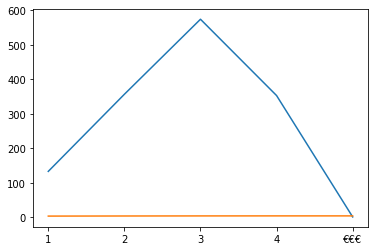

In [9]:
plt.plot(price_group)

In [10]:
yelp_df = yelp_df.rename(columns={"name":"Restaurant Name", "review_count":"Review Count","categories":"Categories","rating":"Rating","transactions":"Delivery","location":"Address","price":"Price","coordinates":"Coordinates"})
yelp_df

,Restaurant Name,Review Count,Categories,Rating,Coordinates,Delivery,Address,Price
0,Junoon Flavors Of India,20,"[{'alias': 'indpak', 'title': 'Indian'}]",5.0,"{'latitude': 38.570471, 'longitude': -121.4571...",False,"{'address1': '3672 J St', 'address2': None, 'a...",NaN
1,Shake Shack,168,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.0,"{'latitude': 38.568686, 'longitude': -121.487243}",True,"{'address1': '1710 R St', 'address2': 'Ste 190...",NaN
2,South,1590,"[{'alias': 'southern', 'title': 'Southern'}]",4.0,"{'latitude': 38.5687015705627, 'longitude': -1...",True,"{'address1': '2005 11th St', 'address2': '', '...",$$
3,Fixins Soul Kitchen,946,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...",4.5,"{'latitude': 38.55147, 'longitude': -121.46924}",True,"{'address1': '3428 3rd Ave', 'address2': '', '...",$$
4,Chando’s Tacos,14,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,"{'latitude': 38.564075, 'longitude': -121.4340...",False,"{'address1': '5644 J St', 'address2': '', 'add...",NaN
...,...,...,...,...,...,...,...,...
709,Smoke Junction Cafe,32,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.0,"{'latitude': 38.7050490891277, 'longitude': -1...",True,"{'address1': '5859 Antelope Rd', 'address2': '...",$
710,Tealicious,169,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 38.5275870192814, 'longitude': -1...",False,"{'address1': '5101 Freeport Blvd', 'address2':...",$
711,Three Sisters Mexican Restaurant,403,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",3.0,"{'latitude': 38.56015, 'longitude': -121.4435}",True,"{'address1': '5100 Folsom Blvd', 'address2': '...",$$
712,Honey Baked Ham Company,66,"[{'alias': 'meats', 'title': 'Meat Shops'}, {'...",3.5,"{'latitude': 38.6623840332031, 'longitude': -1...",True,"{'address1': '5300 Sunrise Blvd', 'address2': ...",$


In [19]:
yelp_df.loc[0,"Coordinates"]

"{'latitude': 38.570471, 'longitude': -121.4571694}"

In [23]:
coord = yelp_df.Coordinates.str.replace(",|}","").str.split(expand=True,).drop([0,2],axis = 1)

In [24]:
coord

,1,3
0,38.570471,-121.4571694
1,38.568686,-121.487243
2,38.5687015705627,-121.497104891816
3,38.55147,-121.46924
4,38.564075,-121.43409833
...,...,...
709,38.7050490891277,-121.328696432458
710,38.5275870192814,-121.495912777778
711,38.56015,-121.4435
712,38.6623840332031,-121.271705627441


In [28]:
yelp_merge = pd.merge(yelp_df, coord, left_index=True, right_index=True)
yelp_merge.head()

,Restaurant Name,Review Count,Categories,Rating,Coordinates,Delivery,Address,Price,1,3
0,Junoon Flavors Of India,20,"[{'alias': 'indpak', 'title': 'Indian'}]",5.0,"{'latitude': 38.570471, 'longitude': -121.4571...",False,"{'address1': '3672 J St', 'address2': None, 'a...",NaN,38.570471,-121.4571694
1,Shake Shack,168,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.0,"{'latitude': 38.568686, 'longitude': -121.487243}",True,"{'address1': '1710 R St', 'address2': 'Ste 190...",NaN,38.568686,-121.487243
2,South,1590,"[{'alias': 'southern', 'title': 'Southern'}]",4.0,"{'latitude': 38.5687015705627, 'longitude': -1...",True,"{'address1': '2005 11th St', 'address2': '', '...",$$,38.5687015705627,-121.497104891816
3,Fixins Soul Kitchen,946,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...",4.5,"{'latitude': 38.55147, 'longitude': -121.46924}",True,"{'address1': '3428 3rd Ave', 'address2': '', '...",$$,38.55147,-121.46924
4,Chando’s Tacos,14,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,"{'latitude': 38.564075, 'longitude': -121.4340...",False,"{'address1': '5644 J St', 'address2': '', 'add...",NaN,38.564075,-121.43409833


In [31]:
yelp_merge.drop("Coordinates", axis=1, inplace=True)

In [34]:
yelp_merge.rename(columns={1:"Latitude",3:"Longitude"}, inplace=True)

In [35]:
yelp_merge

,Restaurant Name,Review Count,Categories,Rating,Delivery,Address,Price,Latitude,Longitude
0,Junoon Flavors Of India,20,"[{'alias': 'indpak', 'title': 'Indian'}]",5.0,False,"{'address1': '3672 J St', 'address2': None, 'a...",NaN,38.570471,-121.4571694
1,Shake Shack,168,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.0,True,"{'address1': '1710 R St', 'address2': 'Ste 190...",NaN,38.568686,-121.487243
2,South,1590,"[{'alias': 'southern', 'title': 'Southern'}]",4.0,True,"{'address1': '2005 11th St', 'address2': '', '...",$$,38.5687015705627,-121.497104891816
3,Fixins Soul Kitchen,946,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...",4.5,True,"{'address1': '3428 3rd Ave', 'address2': '', '...",$$,38.55147,-121.46924
4,Chando’s Tacos,14,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,False,"{'address1': '5644 J St', 'address2': '', 'add...",NaN,38.564075,-121.43409833
...,...,...,...,...,...,...,...,...,...
709,Smoke Junction Cafe,32,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.0,True,"{'address1': '5859 Antelope Rd', 'address2': '...",$,38.7050490891277,-121.328696432458
710,Tealicious,169,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,False,"{'address1': '5101 Freeport Blvd', 'address2':...",$,38.5275870192814,-121.495912777778
711,Three Sisters Mexican Restaurant,403,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",3.0,True,"{'address1': '5100 Folsom Blvd', 'address2': '...",$$,38.56015,-121.4435
712,Honey Baked Ham Company,66,"[{'alias': 'meats', 'title': 'Meat Shops'}, {'...",3.5,True,"{'address1': '5300 Sunrise Blvd', 'address2': ...",$,38.6623840332031,-121.271705627441


In [39]:
yelp_merge["Latitude"] = pd.to_numeric(yelp_merge["Latitude"],errors="coerce")

In [40]:
yelp_merge["Longitude"] = pd.to_numeric(yelp_merge["Longitude"],errors="coerce")

In [48]:
yelp_merge.dropna(subset=["Latitude","Longitude"], inplace= True)

In [53]:
yelp_merge.loc[0,"Address"]

"{'address1': '3672 J St', 'address2': None, 'address3': '', 'city': 'Sacramento', 'zip_code': '95816', 'country': 'US', 'state': 'CA', 'display_address': ['3672 J St', 'Sacramento, CA 95816']}"

In [57]:
yelp_sacramento = yelp_merge[yelp_merge["Address"].str.contains("'CA'")]


In [58]:
info_box_template = """
<dl>
<dt>Restaurant Name</dt><dd>{Restaurant Name}</dd>
<dt>Rating</dt><dd>{Rating}</dd>
<dt>Review Count</dt><dd>{Review Count}</dd>
</dl>
"""
# Store the DataFrame Row


# NOTE: be sure to update with your DataFrame name
restaurant_info = [info_box_template.format(**row) for index, row in yelp_sacramento.iterrows()]
locations = yelp_sacramento[["Latitude", "Longitude"]]

In [59]:
gmaps.configure(api_key=g_key)

In [61]:
figure_layout = {
    'width': '1200px',
    'height': '900px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
figure = gmaps.figure(layout=figure_layout)
markers = gmaps.marker_layer(locations, info_box_content=restaurant_info)
# Add the layer to the map
figure.add_layer(markers)

figure

Figure(layout=FigureLayout(border='1px solid black', height='900px', margin='0 auto 0 auto', padding='1px', wi…